**PROBLEM STATEMENT**

Get the dataset of the 'restaurant review' and build a machine learning model by using different methods

In [ ]:
import pandas as pd

**CREATING DATAFRAME**


In [ ]:
df=pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t',quoting=3)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.isnull().sum()       #it will return null values count.

Review    0
Liked     0
dtype: int64

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Review'][990]

'The refried beans that came with my meal were dried out and crusty and the food was bland.'

In [ ]:
df['Liked'][990]

0

In [ ]:
df['Review'][880]

'I found a six inch long piece of wire in my salsa.'

In [ ]:
df['Liked'][880]      #This review is negative

0

In [ ]:
df['Review'][100]

'Our server was fantastic and when he found out the wife loves roasted garlic and bone marrow, he added extra to our meal and another marrow to go!'

In [ ]:
df['Liked'][100]         #This review is positive

1

In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

**VISUALIZATIONS**

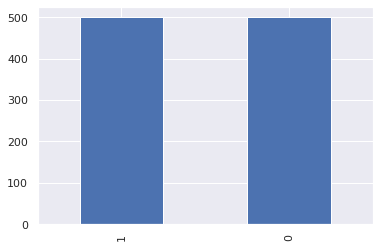

In [ ]:
df['Liked'].value_counts().plot(kind='bar')

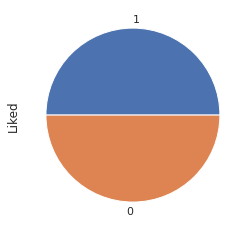

In [ ]:
df['Liked'].value_counts().plot(kind='pie')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


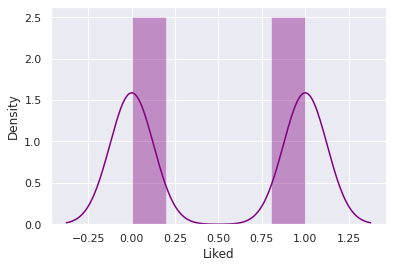

In [ ]:
#SEABORN---->seaborn is a library that uses Matplotlib underneath to plot graphs.it will be used to visualize random distributions.
import seaborn as sns
sns.set_theme()
sns.distplot(df['Liked'],color='purple')

**DEFINE X AND Y**

In [ ]:
x=df['Review'].values
y=df['Liked'].values

In [ ]:
df.shape

(1000, 2)

**SPLIT THE DATASET INTO TRAINING AND TESTING SETS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

**IMPORT COUNTVECTORIZER**

CountVectorizer is used to transform a given text into a vector on the basis of the frequency(count) of each word that occurs in the entire text.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

**METHOD 1:IMPORT SUPPORT VECTOR CLASSIFIER(SVC)**

SVC  will fit to the data you provide, returning a "bestr fit" hyperplane that divides,or catagorizes ,your data.

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test_vect)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.72

**METHOD 2:USING PIPELINE**

Pipeline is used to assemble several steps that can be cross-validated together while setting different parameters.

In [ ]:
from sklearn.pipeline import make_pipeline
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
accuracy_score(y_pred2,y_test)

0.792

**METHOD 3:USING NAIVE BAYES**

It is a probabilistic classifier ,which means it predicts on the basis of the probability of an object

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3=model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
accuracy_score(y_pred3,y_test)

0.744

**METHOD 4: MULTINOMIALNB AND PIPELINE**

In [ ]:
from sklearn.pipeline import make_pipeline
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
accuracy_score(y_pred4,y_test)

0.784

In [ ]:
#accuracy score- 0.72           (SVC)
#accuracy score-0.792            (SVC pipeline)
#accuracy score-0.744  (MultinomialNB)
#accuracy score-0.784   (MultinomialNB pipeline)

In [ ]:
#WEBAPP using this model
# Used to predict entered review is liked or not

**SAVE THE MODEL**

In [ ]:
import joblib
joblib.dump(model2,'spam-Review')

['spam-Review']

In [ ]:
  import joblib
model2=joblib.load('spam-Review')

**PREDICTION OF NEW REVIEWS USING THE MODEL**

In [ ]:
model2.predict(['i love your Food'])           #Entered review  is positive review

array([1])

In [ ]:
model2.predict(['omg!! it is too spicy ,i cannot eat it'])      #Entered review is negative review

array([0])

**STREAMLIT** -USED TO CREATE WEBAPP

It is an open source python library for creating and sharing web apps for data science and machine learning projects.

In [ ]:
!pip install streamlit --quiet

     |████████████████████████████████| 10.1 MB 14.1 MB/s 
     |████████████████████████████████| 111 kB 86.1 MB/s 
     |████████████████████████████████| 4.3 MB 50.4 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 181 kB 86.6 MB/s 
     |████████████████████████████████| 164 kB 84.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 130 kB 74.0 MB/s 
     |████████████████████████████████| 130 kB 57.5 MB/s 
     |████████████████████████████████| 428 kB 84.0 MB/s 
     |████████████████████████████████| 793 kB 80.7 MB/s 
     |████████████████████████████████| 381 kB 88.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 

In [ ]:
%%writefile review.py
import streamlit as st
import joblib
st.title("TEXT/REVIEW CLASSIFICATION")
model2=joblib.load('spam-Review')
ip=st.text_input("Enter the text/review :")
op=model2.predict([ip])
if st.button('PREDICT'):
  st.title(op[0])

Writing review.py


In [ ]:
#To run this streamlit web application
!streamlit run review.py & npx localtunnel --port 8501

2022-04-10 06:26:50.765 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.204.134.241:8501

npx: installed 22 in 4.66s
your url is: https://big-snail-70.loca.lt
